In [32]:
import pandas as pd

bike = pd.read_csv('bike.csv', encoding = 'cp949')
rain = pd.read_csv('rain.csv', encoding = 'cp949')

In [33]:
bike.isna().sum()

대여일시           32
대여건수           32
Unnamed: 2    213
Unnamed: 3    213
Unnamed: 4    213
Unnamed: 5    213
dtype: int64

In [45]:
bike1 = bike.iloc[:181]
bike1 = bike1[['대여일시','대여건수']]
bike1 

,대여일시,대여건수
0,2022-01-01,"29,185"
1,2022-01-02,"28,914"
2,2022-01-03,"53,573"
3,2022-01-04,"56,344"
4,2022-01-05,"57,413"
...,...,...
176,2022-06-26,"122,474"
177,2022-06-27,"94,761"
178,2022-06-28,"112,003"
179,2022-06-29,"52,664"


In [35]:
rain.isna().sum()

날짜           0
지점           0
강수량(mm)    117
dtype: int64

In [36]:
rain

,날짜,지점,강수량(mm)
0,2022-01-01,108,NaN
1,2022-01-02,108,0.3
2,2022-01-03,108,0.0
3,2022-01-04,108,0.0
4,2022-01-05,108,NaN
...,...,...,...
176,2022-06-26,108,NaN
177,2022-06-27,108,6.1
178,2022-06-28,108,6.3
179,2022-06-29,108,37.8


<AxesSubplot:>

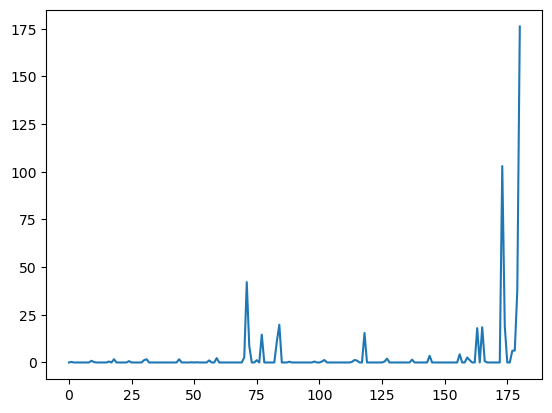

In [37]:
#결측값을 0으로 지정했을 때
rain['강수량(mm)'] = rain['강수량(mm)'].fillna(0)

rain['강수량(mm)'].plot()

<AxesSubplot:>

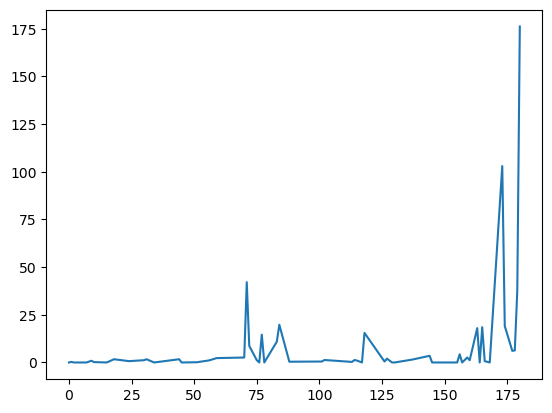

In [15]:
#보간법으로 실시했을 떄
rain['강수량(mm)'] = rain.interpolate()['강수량(mm)']
rain.interpolate()['강수량(mm)'].plot()

#### 결측치를 0으로 지정했을 때, 더 안정적인 모습이므로 결측치 처리는 0으로 진행

# 가설

## 2022년 1월~6월 간 서울에서 강수량이 관측된 날엔 따릉이의 대여량이 관측되지 않은 날보다 적을 것이다.

In [91]:
df1 = pd.concat([bike1, rain], axis=1)
df1 = df1.drop(['날짜', '지점'], axis=1)
df_1m = df1[:31]
df_2m = df1[31:59]
df_3m = df1[59:90]
df_4m = df1[90:120]
df_5m = df1[120:151]
df_6m = df1[151:]

df_1m

,대여일시,대여건수,강수량(mm)
0,2022-01-01,"29,185",0.0
1,2022-01-02,"28,914",0.3
2,2022-01-03,"53,573",0.0
3,2022-01-04,"56,344",0.0
4,2022-01-05,"57,413",0.0
5,2022-01-06,"59,714",0.0
6,2022-01-07,"60,422",0.0
7,2022-01-08,"45,366",0.0
8,2022-01-09,"38,304",0.0
9,2022-01-10,"58,706",0.9


<BarContainer object of 31 artists>

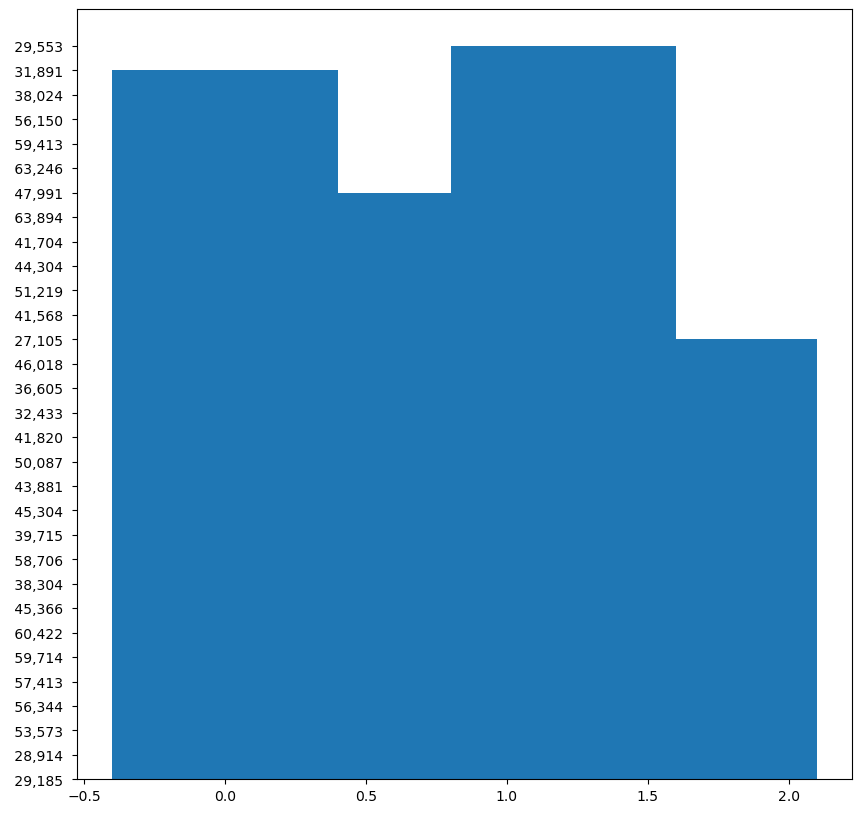

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

x = np.arange()

plt.figure(figsize = (10,10))
plt.bar(df_1m['강수량(mm)'],  df_1m['대여건수'])

# 바그래프가 계속 오류가 나서 시각화는 완벽하게 끝내지 못했습니다ㅠㅠ